# 📒 EDA: Introvert vs Extrovert Prediction

This notebook covers Step 1: Exploratory Data Analysis (EDA).

**Objectives:**
- Load train and test datasets
- Inspect structure, types, and missing values
- Display basic statistics

---

## 1. Load Data
Load the datasets and display their shapes.

## 2. Preview Data
Show the first few rows of train and test sets.

## 3. Data Info & Missing Values
Inspect data types, non-null counts, and count missing values.

## 4. Summary Statistics
Generate descriptive statistics for numeric features.

## 5. Visual Overview (Optional)
- Histograms for numeric columns
- Countplots for categorical columns (`Stage_fear`, `Drained_after_socializing`)

---

**Next Steps:**
- Handle missing values  
- Encode categorical features  
- Build feature engineering and modeling pipeline

In [1]:
import pandas as pd

In [4]:
# Load datasets
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

# Display shapes
display(df_train.shape, df_test.shape)

(18524, 9)

(6175, 8)

In [5]:
# Preview data
df_train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [7]:
df_train.info()
print("\nMissing values per column:\n", df_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB

Missing values per column:
 id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_s

In [9]:
df_test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [8]:
df_test.info()
print("\nMissing values per column:\n", df_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB

Missing values per column:
 id                             0
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequ

In [12]:
# Summary statistics for numeric features
df_train.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [11]:
# Summary statistics for numeric features
df_test.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,6175.000000,5750.000000,5778.000000,5709.000000,5825.000000,5767.000000
mean,21611.000000,3.116870,5.287989,4.037835,8.008412,5.028958
std,1782.713288,2.985658,2.758052,2.045207,4.192701,2.867285
min,18524.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20067.500000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,21611.000000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,23154.500000,4.000000,8.000000,6.000000,12.000000,7.000000
max,24698.000000,11.000000,10.000000,7.000000,15.000000,10.000000


Text(0.5, 1.0, 'Personality Distribution')

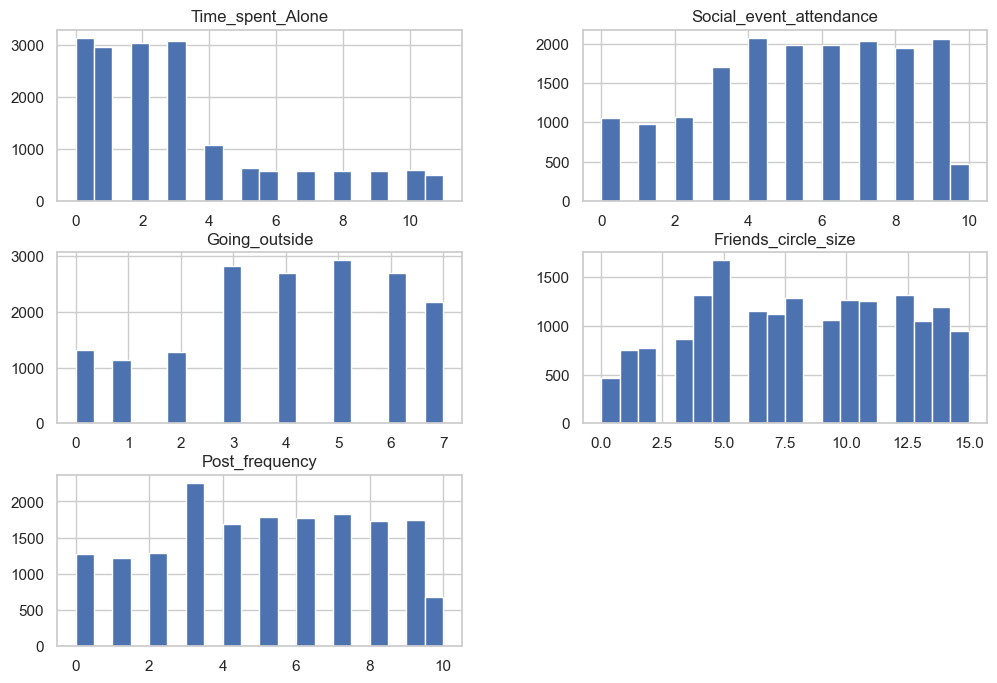

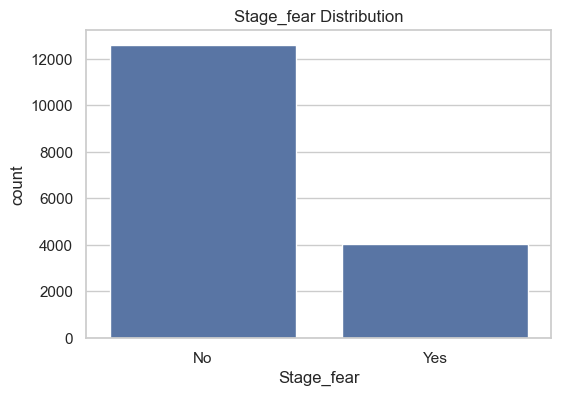

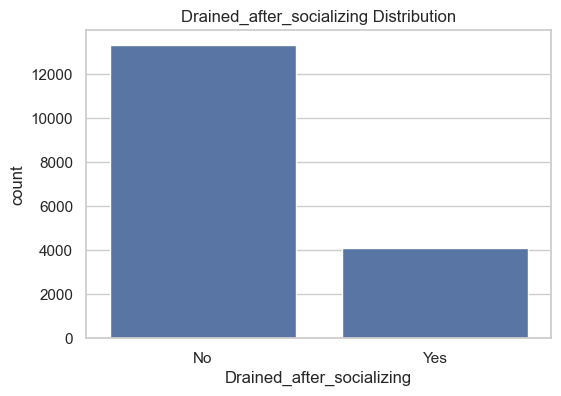

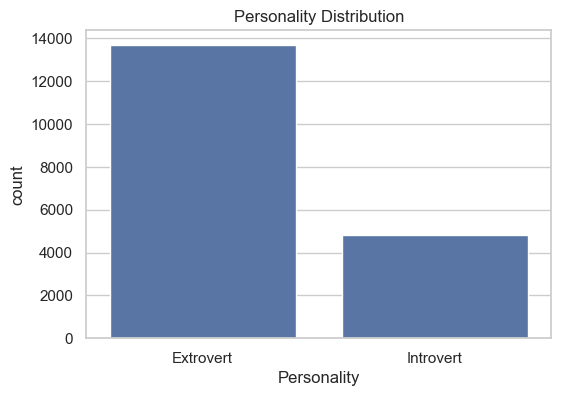

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")

# Histograms of numeric features
numeric_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency', 'Personality']
df_train[numeric_cols].hist(bins=20, figsize=(12, 8));

# Countplots for categorical features
plt.figure(figsize=(6, 4))
sns.countplot(x='Stage_fear', data=df_train)
plt.title('Stage_fear Distribution')

plt.figure(figsize=(6, 4))
sns.countplot(x='Drained_after_socializing', data=df_train)
plt.title('Drained_after_socializing Distribution')

plt.figure(figsize=(6, 4))
sns.countplot(x='Personality', data=df_train)
plt.title('Personality Distribution')


## Summary of Observations 📋

- **Missing Values**: Approximately 8–12% of data is missing per feature in the training set, while the `Personality` label is fully populated.

- **Key Predictors**:
  - **Time_spent_Alone**: Introverts tend to spend noticeably more hours alone than extroverts.
  - **Drained_after_socializing**: Individuals reporting fatigue after socializing are more likely to be introverts.
  - **Stage_fear**: Public speaking anxiety correlates with introversion.

These patterns confirm that these features carry strong signals for distinguishing introverts from extroverts, and they should be prioritized in our modeling pipeline.